In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from scipy import stats

In [2]:
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer

In [3]:
df=pd.read_csv('concrete_data.csv')

In [4]:
df.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

In [5]:
df=df.rename(columns={'concrete_compressive_strength':'strength'})

In [6]:
df.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age', 'strength'],
      dtype='object')

In [7]:
df.shape

(1030, 9)

In [8]:
df.isnull().sum()

cement                0
blast_furnace_slag    0
fly_ash               0
water                 0
superplasticizer      0
coarse_aggregate      0
fine_aggregate        0
age                   0
strength              0
dtype: int64

In [9]:
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


there is no negative value but there is still 0

In [10]:
X=df.drop(columns=['strength'],axis=1)
y=df['strength']

In [11]:
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [12]:
lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)

print('r2 score:', r2_score(y_pred,y_test))

r2 score: 0.42317047978909705


In [13]:
## cross tab validation
lr=LinearRegression()

print(np.mean(cross_val_score(lr,X,y,scoring='r2')))

0.4609940491662864


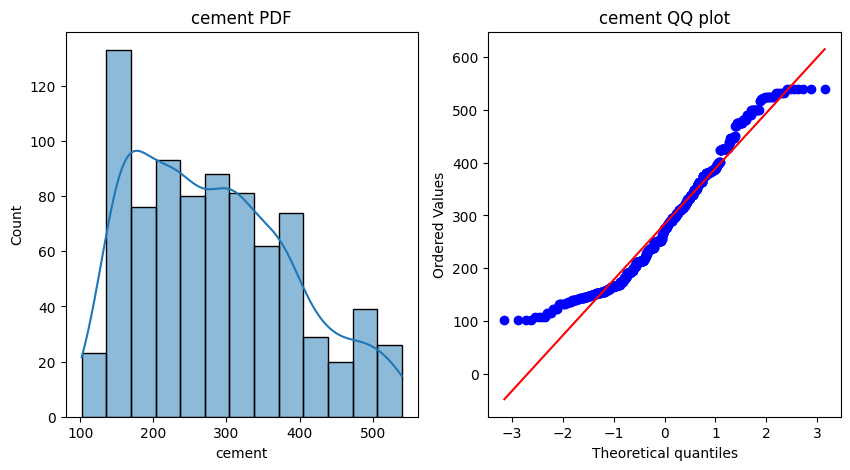

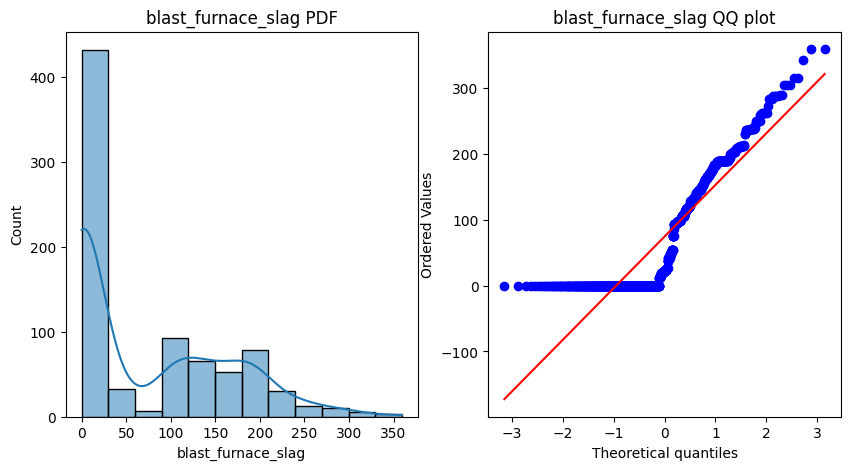

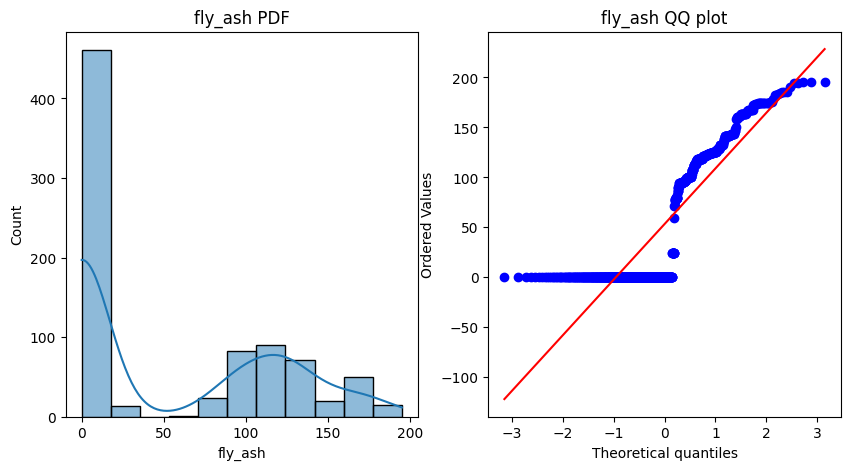

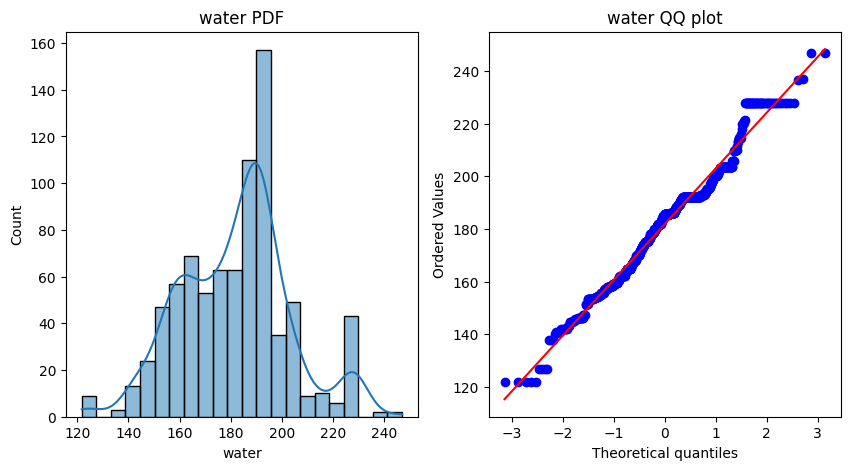

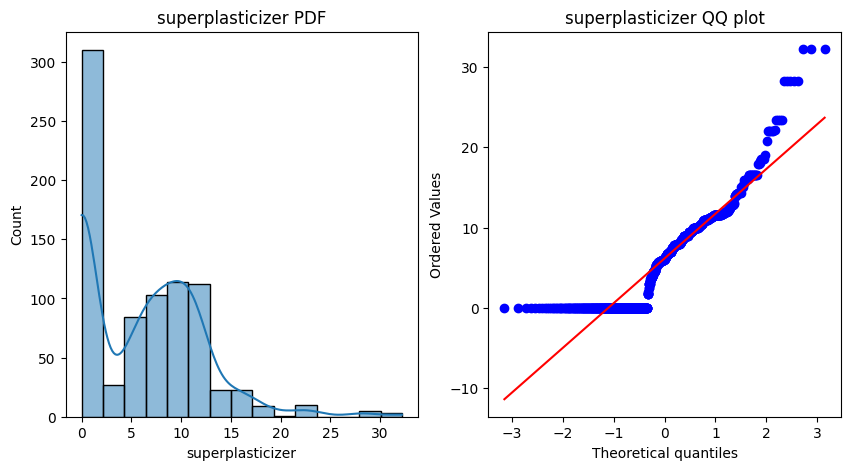

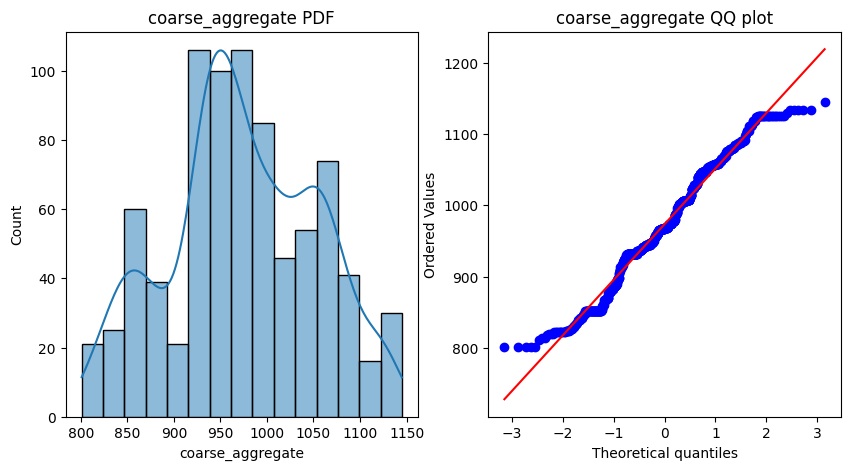

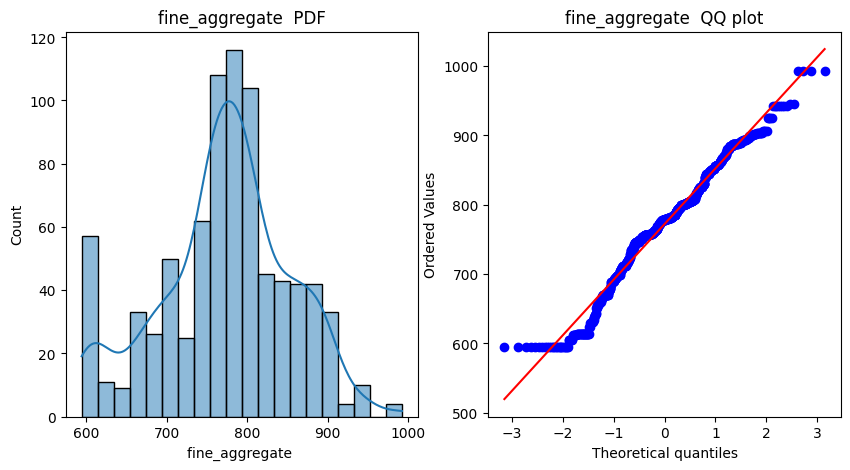

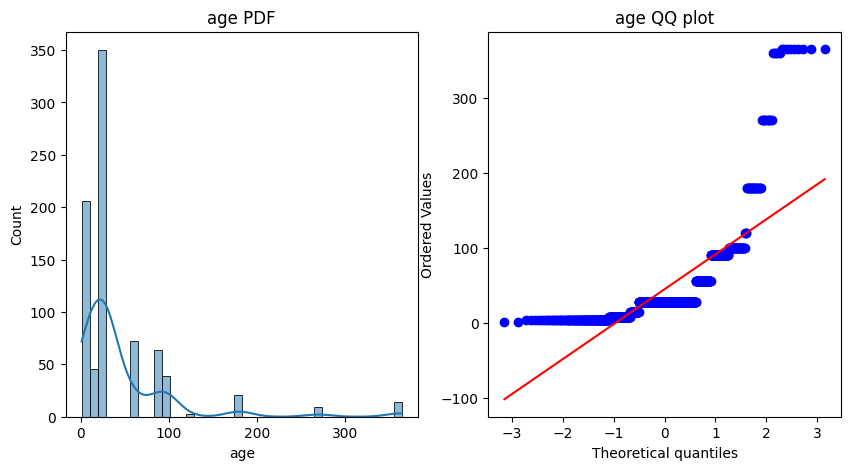

In [14]:
for col in X_train.columns:
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.histplot(X_train[col],kde=True)
    plt.title(f"{col} PDF")

    plt.subplot(1,2,2)
    stats.probplot(X_train[col],dist='norm',plot=plt)
    plt.title(f"{col} QQ plot")

    plt.show()

In [15]:
#default Powertransformer parameters 
## class sklearn.preprocessing.PowerTransformer(method='yeo-johnson', *, standardize=True, copy=True)[source]


In [16]:
# Box cox cannot handle the zero value... 
pt=PowerTransformer(method='box-cox')

X_train_transformed=pt.fit_transform(X_train+0.0000000001)
X_test_transformed=pt.transform(X_test+0.00000000001)

pd.DataFrame({'cols':X_train.columns, 'box-cox_lambdas':pt.lambdas_})



,cols,box-cox_lambdas
0,cement,0.177025
1,blast_furnace_slag,0.017671
2,fly_ash,-0.025976
3,water,0.772682
4,superplasticizer,0.064135
5,coarse_aggregate,1.129813
6,fine_aggregate,1.782018
7,age,0.066631


In [17]:
# applying the linear regression on the transformed data

lr=LinearRegression()

lr.fit(X_train_transformed, y_train)

y_pred=lr.predict(X_test_transformed)
r2_score(y_test, y_pred)

0.7993560116458878

In [18]:
## applying the cross val score for checking on the multiple inputs

pt=PowerTransformer(method='box-cox')

X_transformed=pt.fit_transform(X+0.00000000001)

lr=LinearRegression()
np.mean(cross_val_score(lr, X_transformed, y, scoring='r2'))

np.float64(0.6647104118110869)

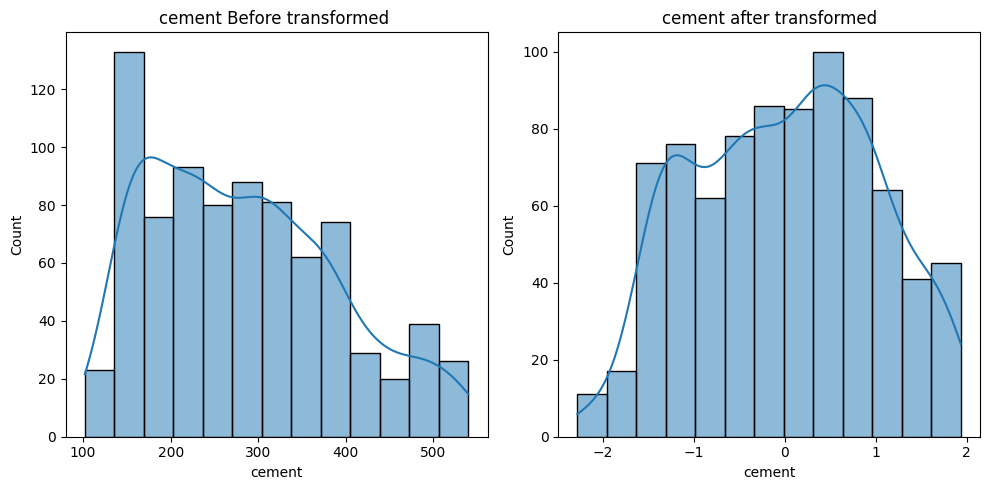

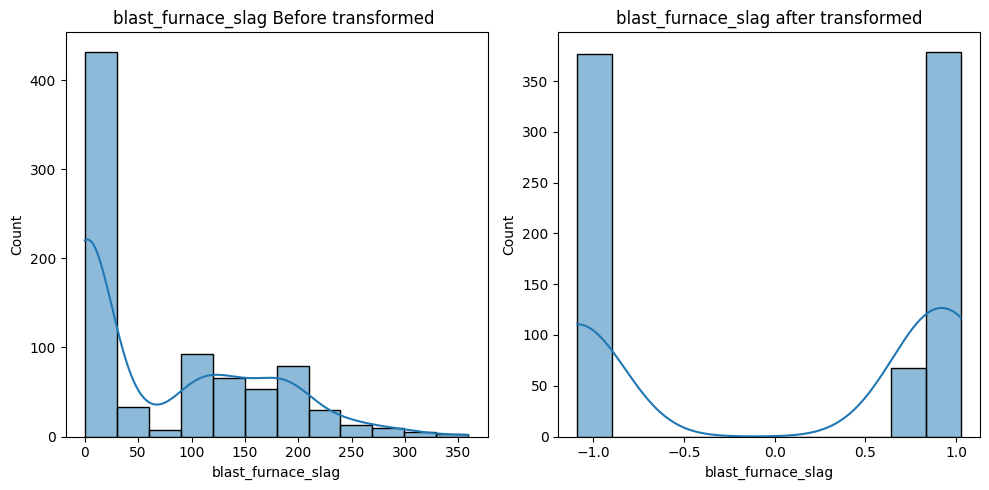

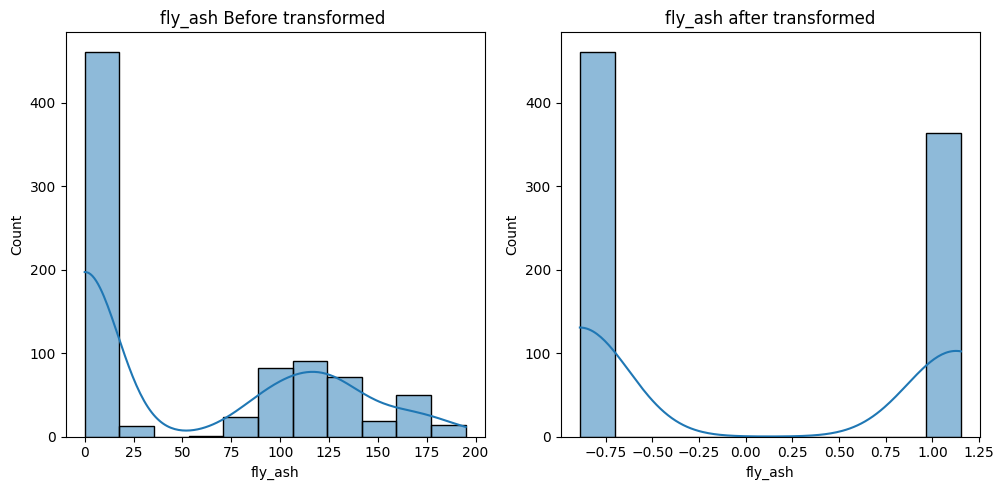

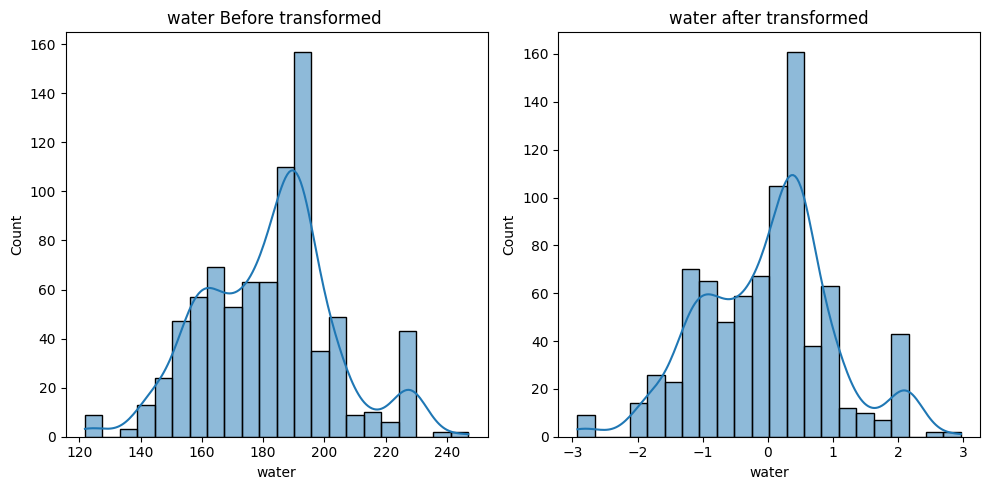

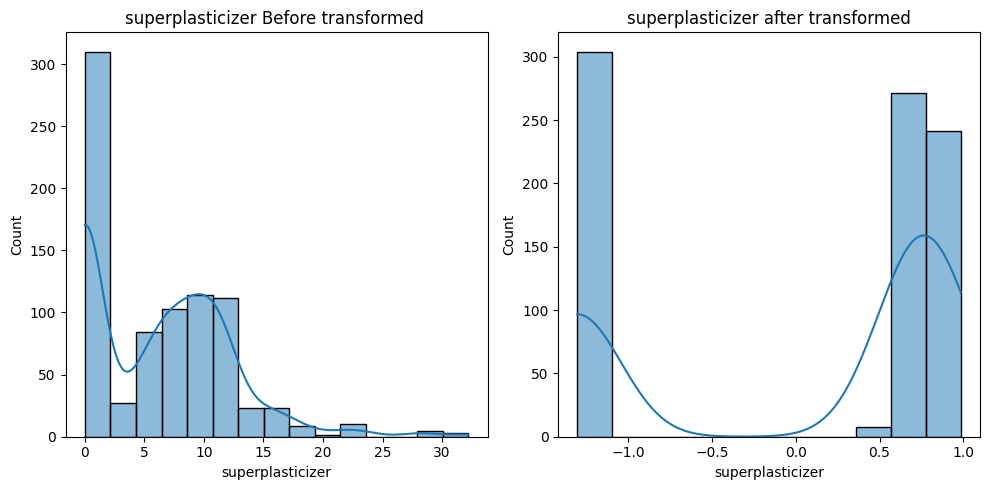

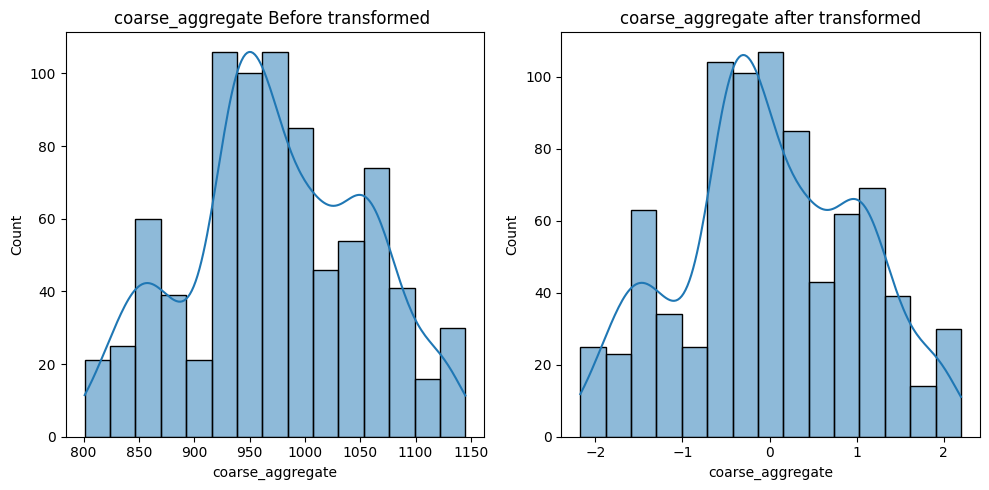

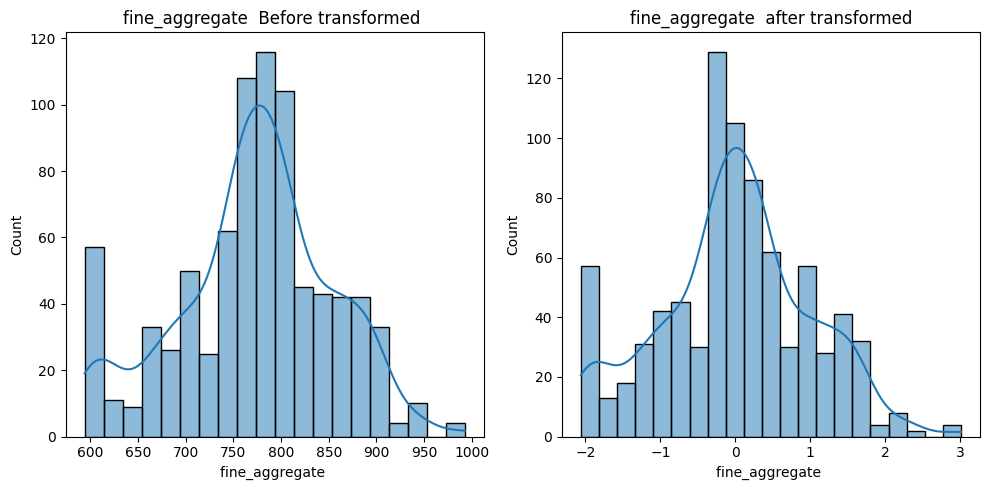

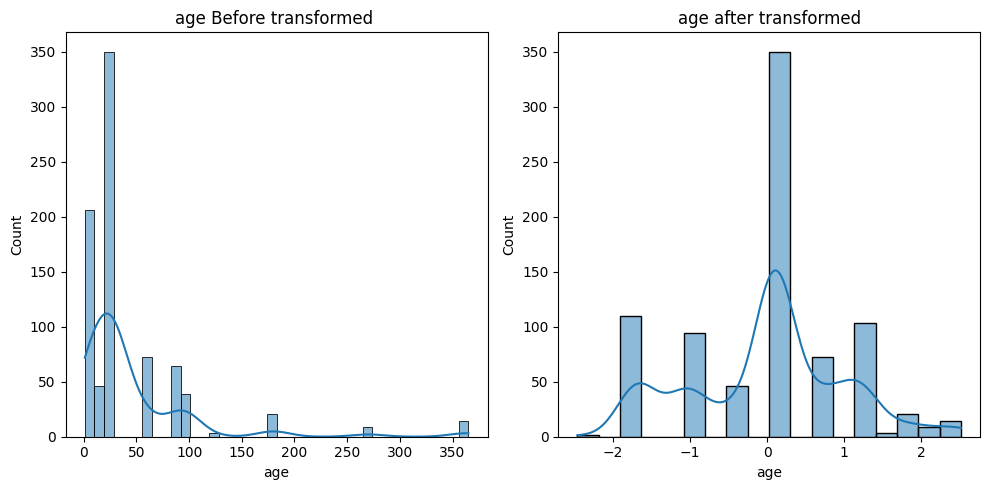

In [19]:
# before and after comparison on the Box-cox plot

X_train_transformed=pd.DataFrame(X_train_transformed, columns=X_train.columns)
for col in X_train.columns:
    plt.figure(figsize=(10,5))

    plt.subplot(1,2,1)
    sns.histplot(X_train[col], kde=True)
    plt.title(f"{col} Before transformed ")
    
    plt.subplot(1,2,2)
    sns.histplot(X_train_transformed[col], kde=True)
    plt.title(f'{col} after transformed')
    plt.tight_layout()
    plt.show()

In [20]:
## Apply Yeo-Johnson

pt1=PowerTransformer()          # we do not apply any paprameter By default Yeo-Johnson
X_train_transformed2=pt1.fit_transform(X_train)
X_test_transformed2=pt1.transform(X_test)

lr=LinearRegression()

lr.fit(X_train_transformed2, y_train)
y_pred3 = lr.predict(X_test_transformed2)

print(r2_score(y_test, y_pred3))

pd.DataFrame({'cols':X_train.columns, 'Yeo lambda value':pt1.lambdas_})




0.8161906511066099


,cols,Yeo lambda value
0,cement,0.174348
1,blast_furnace_slag,0.015715
2,fly_ash,-0.161447
3,water,0.771307
4,superplasticizer,0.253935
5,coarse_aggregate,1.130050
6,fine_aggregate,1.783100
7,age,0.019885


In [21]:
## applying the cross val score for checking on the multiple inputs

pt1=PowerTransformer()

X_transformed2=pt1.fit_transform(X+0.00000000001)

lr=LinearRegression()
np.mean(cross_val_score(lr, X_transformed2, y, scoring='r2'))

np.float64(0.6834625138699413)

In [22]:
X_train_transformed2=pd.DataFrame(X_train_transformed2, columns=X_train.columns)

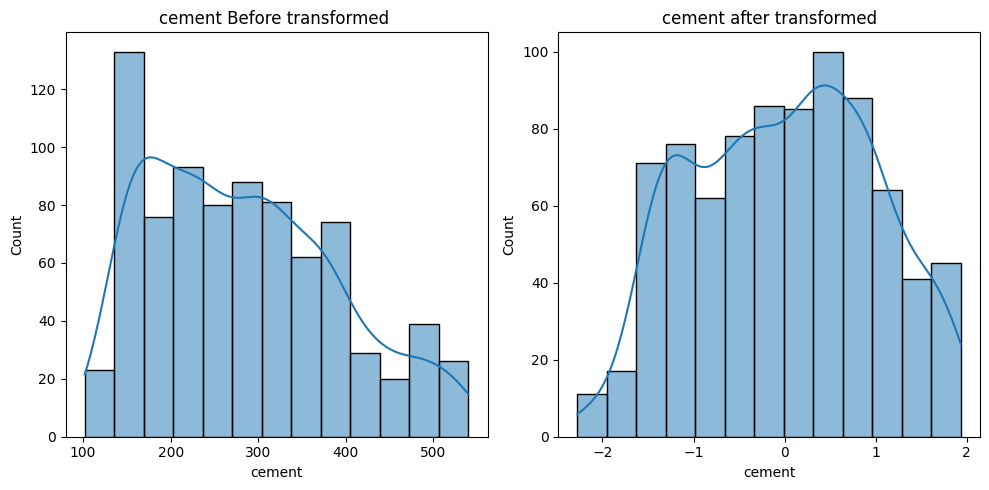

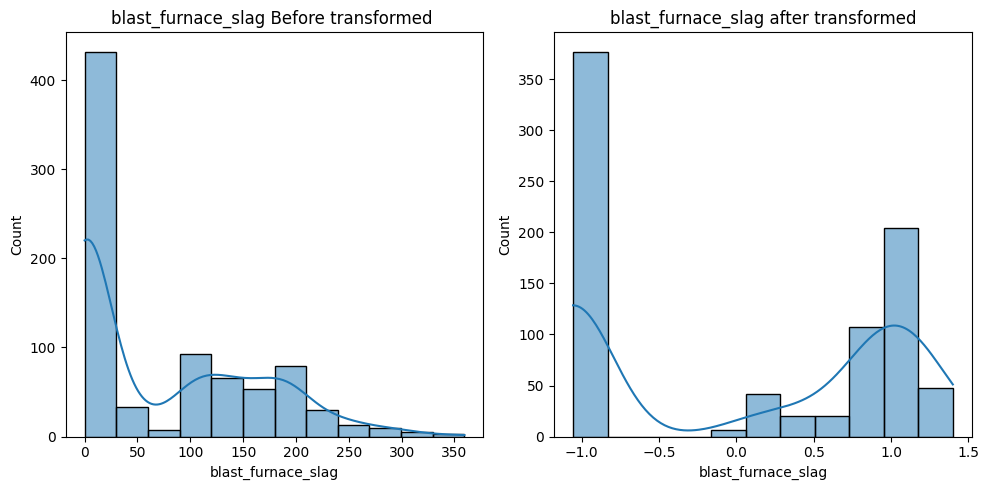

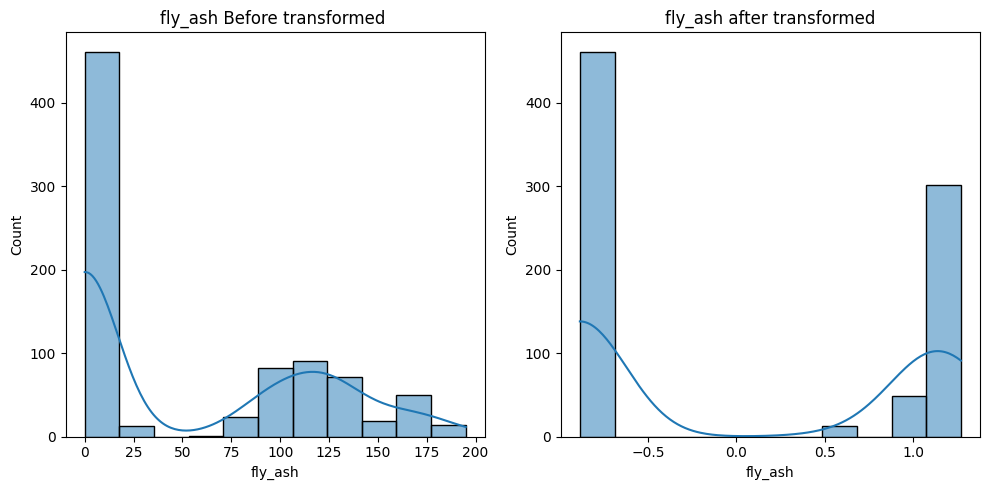

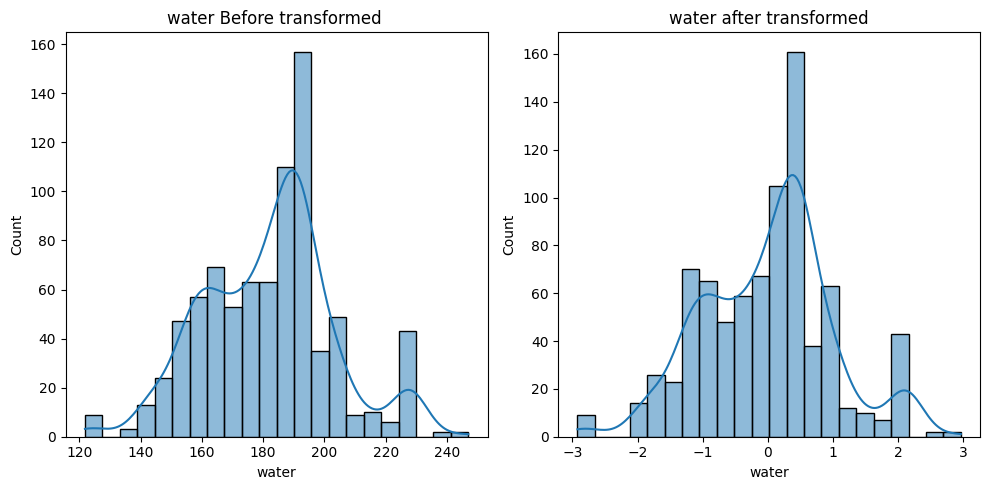

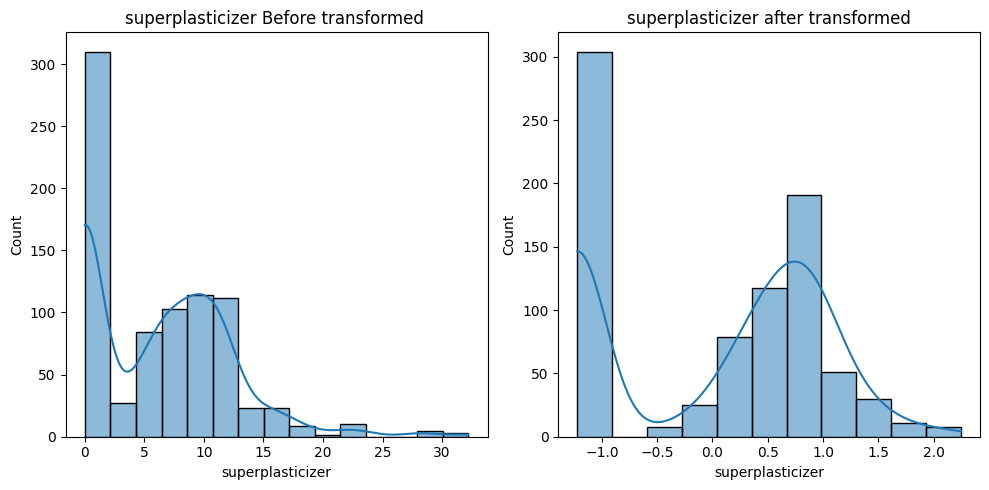

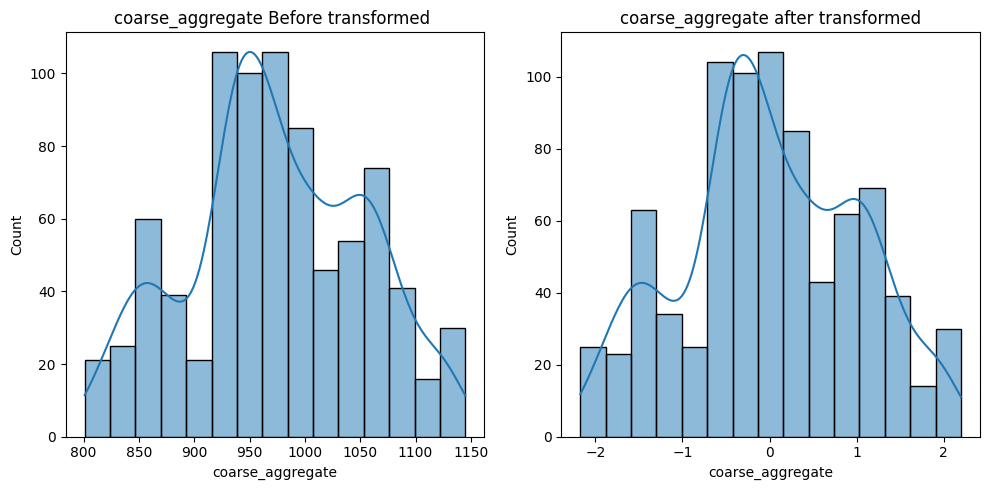

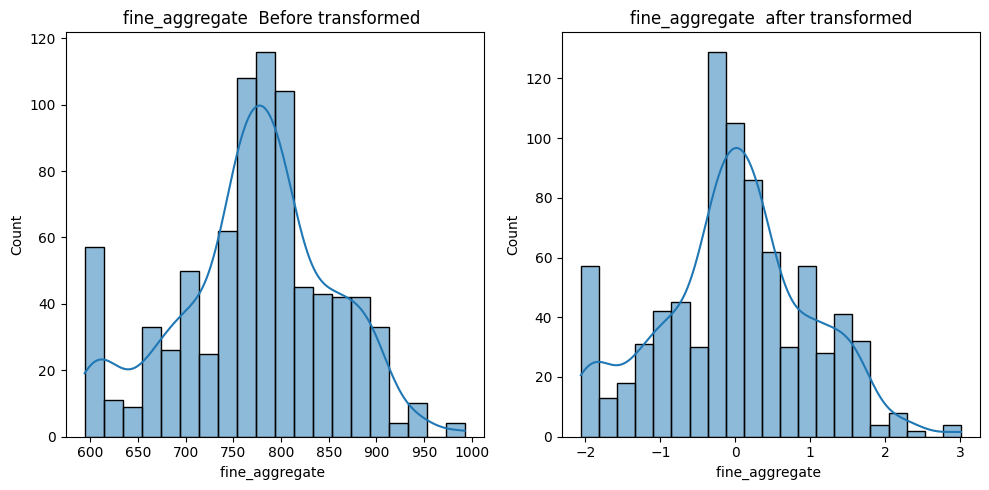

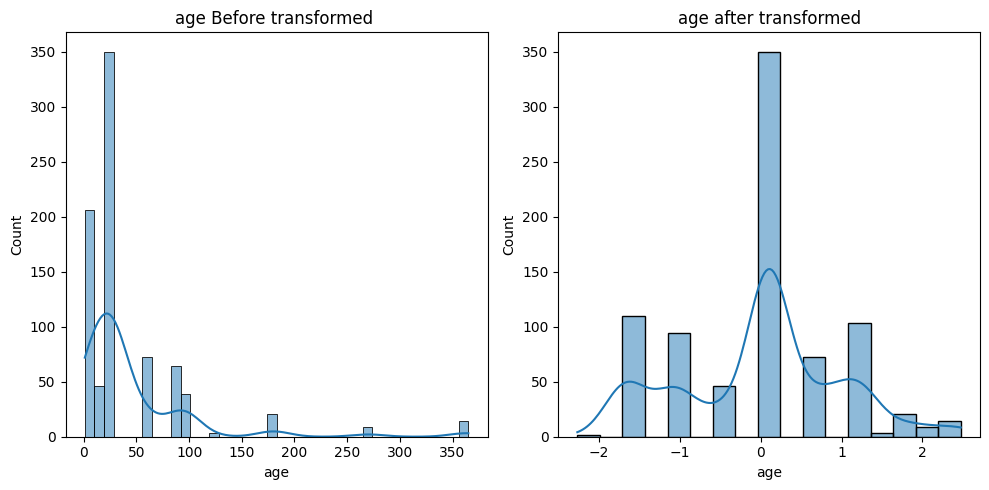

In [23]:
# before and after comparison on the Yeo-Johnson plot

for col in X_train.columns:
    plt.figure(figsize=(10,5))

    plt.subplot(1,2,1)
    sns.histplot(X_train[col], kde=True)
    plt.title(f"{col} Before transformed ")
    
    plt.subplot(1,2,2)
    sns.histplot(X_train_transformed2[col], kde=True)
    plt.title(f'{col} after transformed')
    plt.tight_layout()
    plt.show()

In [24]:
pd.DataFrame({'cols':X_train.columns, 'Box-Cox_lambda':pt.lambdas_, 'Yeo-johnson_Lambda':pt1.lambdas_})

,cols,Box-Cox_lambda,Yeo-johnson_Lambda
0,cement,0.172271,0.169544
1,blast_furnace_slag,0.016525,0.016633
2,fly_ash,-0.019926,-0.136480
3,water,0.809568,0.808438
4,superplasticizer,0.059404,0.264160
5,coarse_aggregate,1.129168,1.129395
6,fine_aggregate,1.829625,1.830764
7,age,0.048975,0.001771
